## Model Test

In [6]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet18_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Files already downloaded and verified
Before temperature - NLL: 0.306, ECE: 0.041
Optimal temperature: 4.904
After temperature - NLL: 0.869, ECE: 0.460


APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5281 ± 0.0033
Final Average Prediction Set Size: 1.55 ± 0.02
Final Average Coverage: 0.9467 ± 0.0025
Final Average Real Probability: 0.9197 ± 0.0029


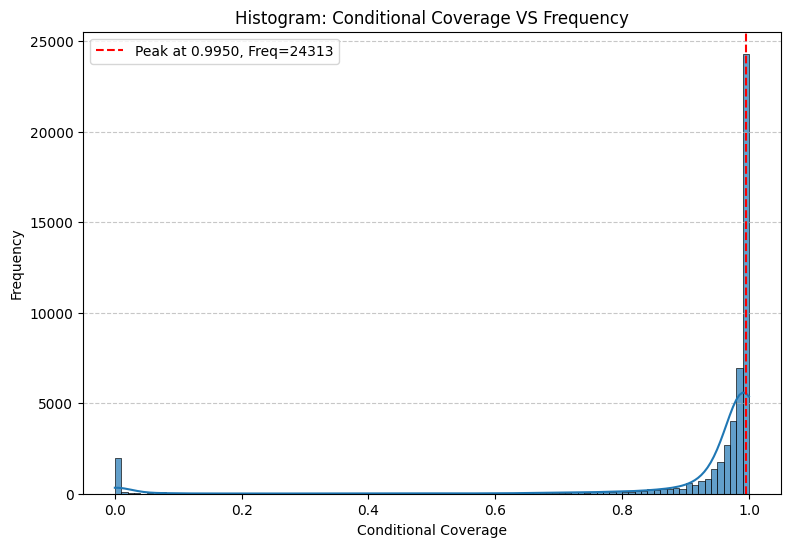

24313 (48.63%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5305 ± 0.0027
Final Average Prediction Set Size: 1.55 ± 0.02
Final Average Coverage: 0.9471 ± 0.0027
Final Average Real Probability: 0.9201 ± 0.0031


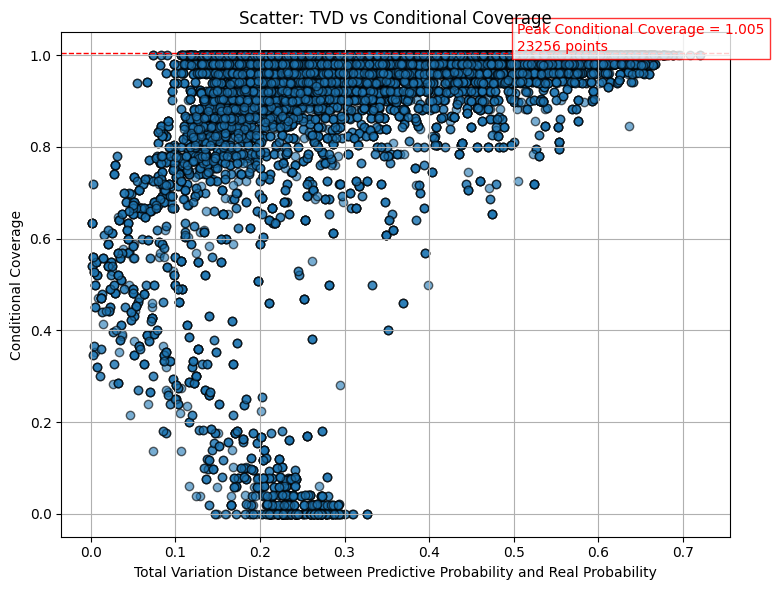

Peak Conditional Coverage = 1.005, with 23256 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.83001']
  Real Probability Set      : ['0.94000']
Sample 2:
  Predictive Probability Set: ['0.85268']
  Real Probability Set      : ['1.00000']
Sample 3:
  Predictive Probability Set: ['0.81557']
  Real Probability Set      : ['0.97959']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.27551', '0.11116', '0.09505', '0.09400']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.15397', '0.15281', '0.14615', '0.10509']
  Real Probability Set      : ['0.02041', '0.02041', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.42474']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.46755', '0.16703']
  Real Probab

In [7]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5368 ± 0.0033
Final Average Prediction Set Size: 1.47 ± 0.02
Final Average Coverage: 0.9469 ± 0.0029
Final Average Real Probability: 0.9195 ± 0.0033


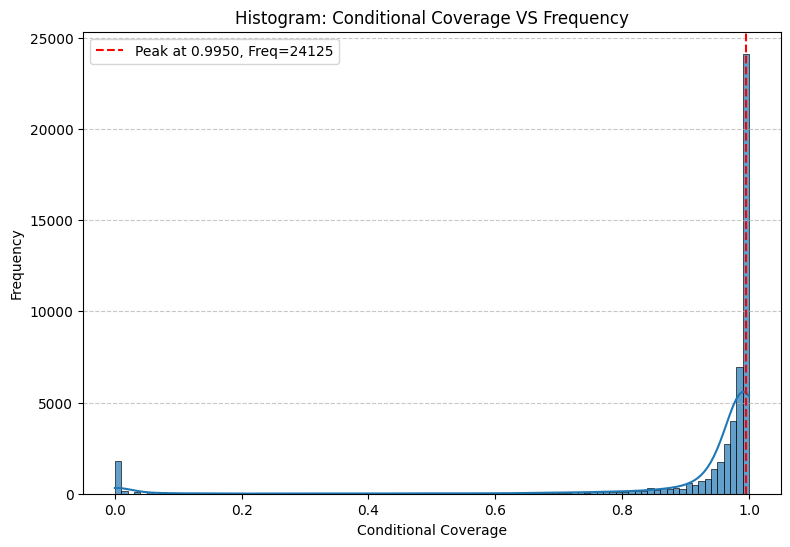

24125 (48.25%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.05, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5400 ± 0.0026
Final Average Prediction Set Size: 1.48 ± 0.02
Final Average Coverage: 0.9473 ± 0.0026
Final Average Real Probability: 0.9201 ± 0.0031


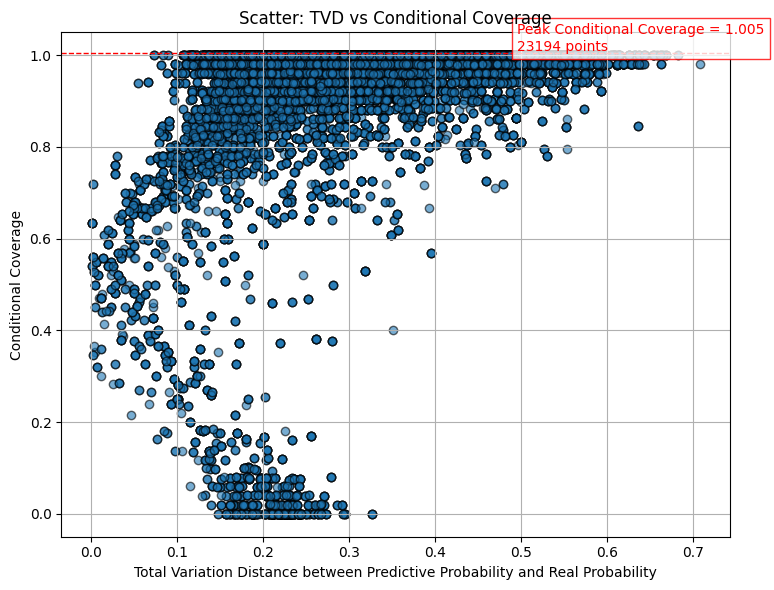

Peak Conditional Coverage = 1.005, with 23194 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.61523']
  Real Probability Set      : ['0.80000']
Sample 2:
  Predictive Probability Set: ['0.68032']
  Real Probability Set      : ['0.84615']
Sample 3:
  Predictive Probability Set: ['0.64998']
  Real Probability Set      : ['0.80769']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.24802', '0.19614']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.63898']
  Real Probability Set      : ['0.08000']
Sample 3:
  Predictive Probability Set: ['0.38300', '0.10306']
  Real Probability Set      : ['0.00000', '0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.46755', '0.16703']
  Real Probability Set      : ['0.03922', '0.52941']
Sample 2:
  Predictive Probability Set: ['0.2549

In [8]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1494 ± 0.1229
Final Average Prediction Set Size: 1.30 ± 0.06
Final Average Coverage: 0.9492 ± 0.0038
Final Average Real Probability: 0.9201 ± 0.0047


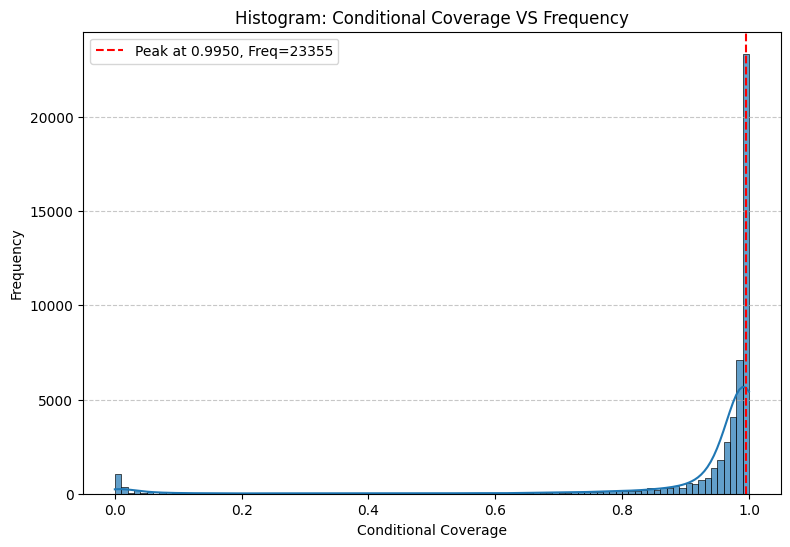

23355 (46.71%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1029 ± 0.0982
Final Average Prediction Set Size: 1.28 ± 0.05
Final Average Coverage: 0.9497 ± 0.0035
Final Average Real Probability: 0.9203 ± 0.0044


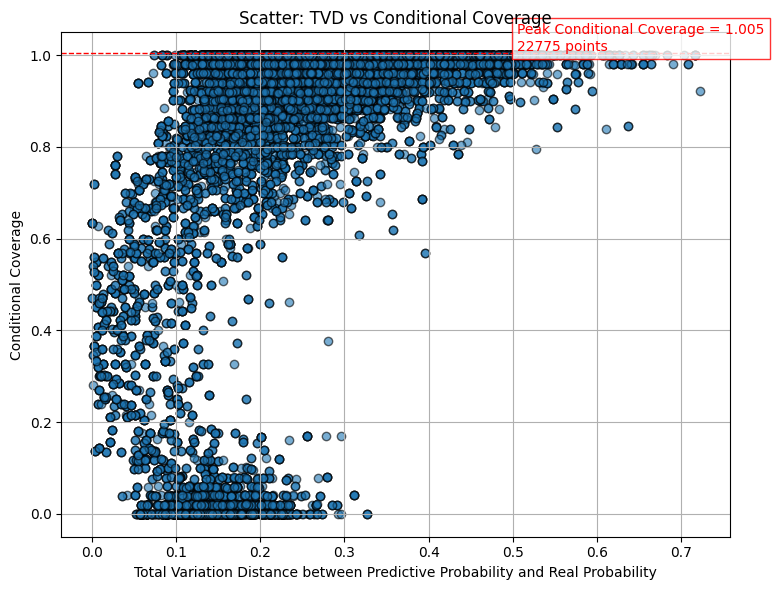

Peak Conditional Coverage = 1.005, with 22775 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.67380']
  Real Probability Set      : ['0.83333']
Sample 2:
  Predictive Probability Set: ['0.60775']
  Real Probability Set      : ['0.80392']
Sample 3:
  Predictive Probability Set: ['0.64649']
  Real Probability Set      : ['0.82353']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.24802', '0.19614']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.51638']
  Real Probability Set      : ['0.09434']
Sample 3:
  Predictive Probability Set: ['0.45014']
  Real Probability Set      : ['0.04082']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.28861', '0.21722']
  Real Probability Set      : ['0.72549', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.26107', '0.20725']
  Real 

In [9]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.05)